# **Reinforcement Learning Project / Zachary JANATI & Chafi KHERMOUCHE / DS2E 2023**

# **Import**

In [10]:
import gym # c'est la librairie qui contient l'environnement qui sera utilisé
import matplotlib.pyplot as plt # librairie de data visualisation
import numpy as np #permet de faire le calcul matricielle
from matplotlib.pyplot import figure #definit la taille de l'image à afficher
import pandas as pd
from numpy.random import randn, random
from sklearn.model_selection import train_test_split
from IPython.display import display, Math
import numpy as np
#import des librairies de machine learning
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# **Création de l'environnement**

In [11]:
SEED = 42 #pour initialiser le generateur de nombre ou d'actions aleatoires
env = gym.make('CliffWalking-v0') #permet de creer l'environnement
env.action_space.seed(SEED)

[42]

In [12]:
observation_space = env.observation_space # decrit l'environnement, le champ d'action po
action_space = env.action_space # dit le nombre d'action possible sur un carreau
reward_space = env.reward_range # donne les recompenses possibles
print(f"The observation space: {observation_space}")
print(f"The action space: {action_space}")
print(f"The reward range: {reward_space}")

The observation space: Discrete(48)
The action space: Discrete(4)
The reward range: (-inf, inf)


In [13]:
env.P

{0: {0: [(1.0, 0, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 12, -1, False)],
  3: [(1.0, 0, -1, False)]},
 1: {0: [(1.0, 1, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 13, -1, False)],
  3: [(1.0, 0, -1, False)]},
 2: {0: [(1.0, 2, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 14, -1, False)],
  3: [(1.0, 1, -1, False)]},
 3: {0: [(1.0, 3, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 15, -1, False)],
  3: [(1.0, 2, -1, False)]},
 4: {0: [(1.0, 4, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 16, -1, False)],
  3: [(1.0, 3, -1, False)]},
 5: {0: [(1.0, 5, -1, False)],
  1: [(1.0, 6, -1, False)],
  2: [(1.0, 17, -1, False)],
  3: [(1.0, 4, -1, False)]},
 6: {0: [(1.0, 6, -1, False)],
  1: [(1.0, 7, -1, False)],
  2: [(1.0, 18, -1, False)],
  3: [(1.0, 5, -1, False)]},
 7: {0: [(1.0, 7, -1, False)],
  1: [(1.0, 8, -1, False)],
  2: [(1.0, 19, -1, False)],
  3: [(1.0, 6, -1, False)]},
 8: {0: [(1.0, 8, -1, False)],
  1: [(1.0, 9, -1, False)],
  2: 

In [14]:
GAUCHE = 0
BAS = 1
DROITE = 2
HAUT = 3
observation=env.reset(seed = SEED)

In [15]:
random_action = env.action_space.sample() # cette fonction "sample" permet de choisir un
new_observation, reward, done, info = env.step(random_action)
print(f"New Observation: {observation}")
print(f"info: {info}", f" and donne: {done}" )


New Observation: 36
info: {'prob': 1.0}  and donne: False


In [20]:
import gym

# Créer l'environnement CliffWalking
env = gym.make('CliffWalking-v0')

# Obtenir le nombre d'états et d'actions
n_states = env.observation_space.n
n_actions = env.action_space.n

# Initialiser la matrice des récompenses et des transitions
R = [[0 for _ in range(n_states)] for _ in range(n_states)]  # Récompenses
P = [[[] for _ in range(n_actions)] for _ in range(n_states)]  # Transitions

# Remplir les matrices R et P en fonction de l'environnement
for state in range(n_states):
    for action in range(n_actions):
        transitions = env.P[state][action]
        for prob, next_state, reward, done in transitions:
            R[state][next_state] = reward
            P[state][action].append((prob, next_state, reward, done))


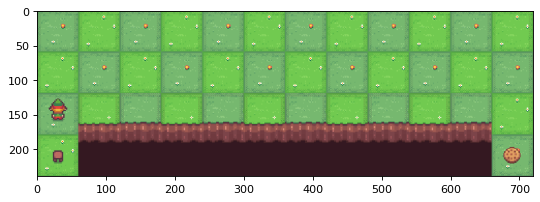

In [16]:
figure(figsize=(8, 8), dpi=80)
plt.imshow(env.render(mode = 'rgb_array'))

New Observation: 24
New Observation: 24
New Observation: 36
New Observation: 36
New Observation: 36
New Observation: 36
New Observation: 36
New Observation: 36
New Observation: 24
New Observation: 12
New Observation: 13
New Observation: 14
New Observation: 26
New Observation: 36


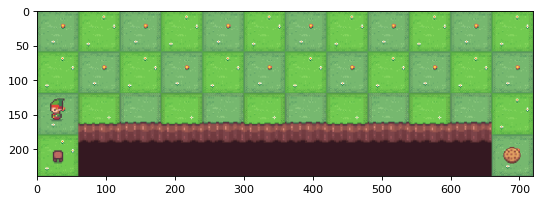

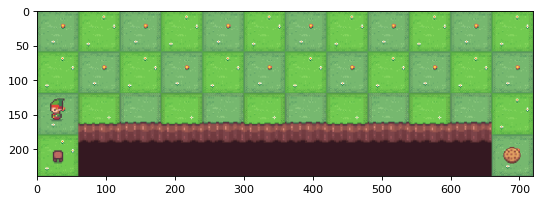

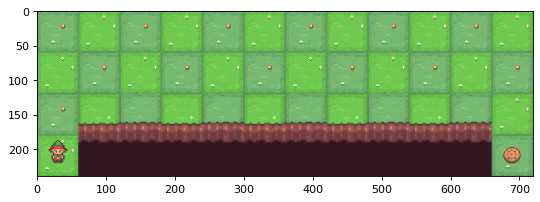

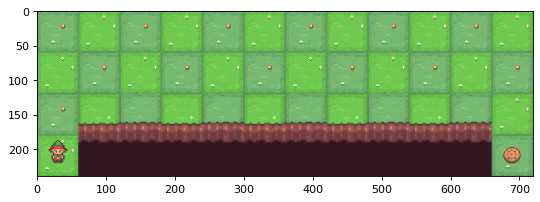

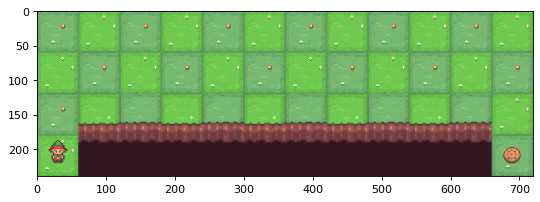

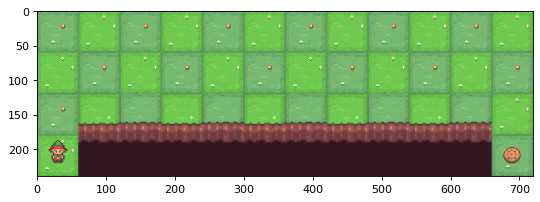

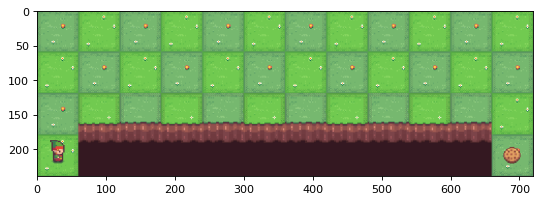

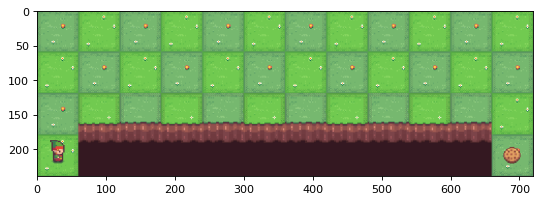

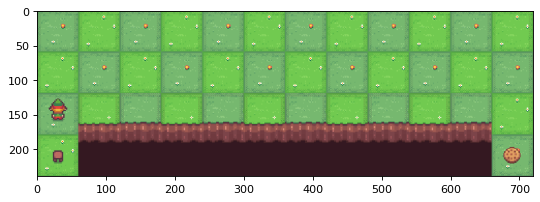

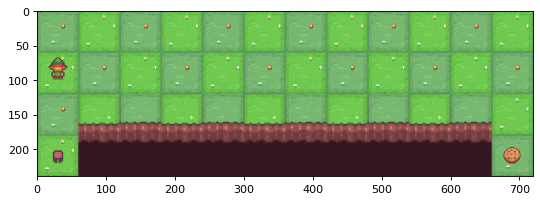

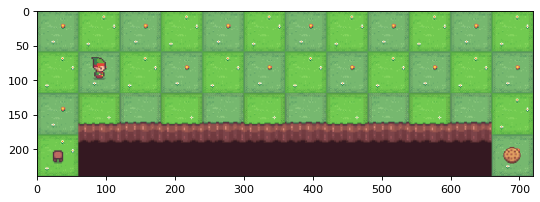

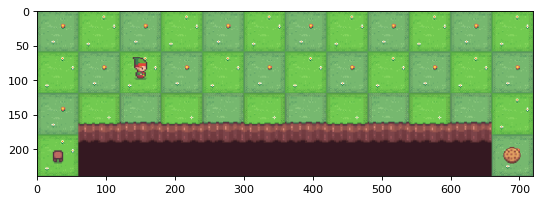

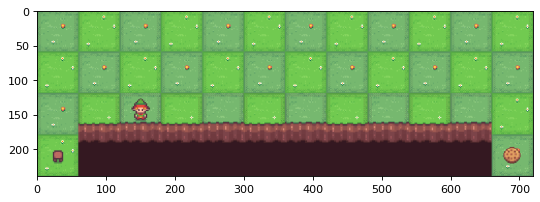

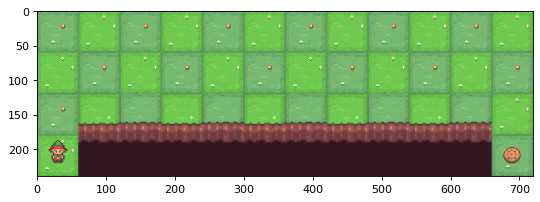

In [17]:
# Ici nous imposons un ensemble d'actions (politique) à notre agent dans le but d'atteind
politique = [HAUT, HAUT, DROITE, DROITE, DROITE, DROITE, BAS, BAS, GAUCHE, GAUCHE, BAS, BAS, DROITE, DROITE]
# La boucle suivante permet d'iterer sur l'ensemble des actions imposées
for i in range(14):
 action = politique[i]
 new_observation, reward, done, info = env.step(action)
 print(f"New Observation: {new_observation}")
 figure(figsize=(8, 8), dpi=80)
 plt.imshow(env.render(mode = 'rgb_array'))

In [19]:
env.P

{0: {0: [(1.0, 0, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 12, -1, False)],
  3: [(1.0, 0, -1, False)]},
 1: {0: [(1.0, 1, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 13, -1, False)],
  3: [(1.0, 0, -1, False)]},
 2: {0: [(1.0, 2, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 14, -1, False)],
  3: [(1.0, 1, -1, False)]},
 3: {0: [(1.0, 3, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 15, -1, False)],
  3: [(1.0, 2, -1, False)]},
 4: {0: [(1.0, 4, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 16, -1, False)],
  3: [(1.0, 3, -1, False)]},
 5: {0: [(1.0, 5, -1, False)],
  1: [(1.0, 6, -1, False)],
  2: [(1.0, 17, -1, False)],
  3: [(1.0, 4, -1, False)]},
 6: {0: [(1.0, 6, -1, False)],
  1: [(1.0, 7, -1, False)],
  2: [(1.0, 18, -1, False)],
  3: [(1.0, 5, -1, False)]},
 7: {0: [(1.0, 7, -1, False)],
  1: [(1.0, 8, -1, False)],
  2: [(1.0, 19, -1, False)],
  3: [(1.0, 6, -1, False)]},
 8: {0: [(1.0, 8, -1, False)],
  1: [(1.0, 9, -1, False)],
  2: 

# **Modèle déterministe**

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Nombre total de succès : 989

Q-table after training:
[[ -6.86868198  -6.91096058  -7.03802275  -6.86868198]
 [ -6.63299138  -6.65123736  -6.63791571  -6.94240249]
 [ -6.63299138  -6.55839508  -6.53996024  -6.56323611]
 [ -6.37956062  -6.30199611  -6.229

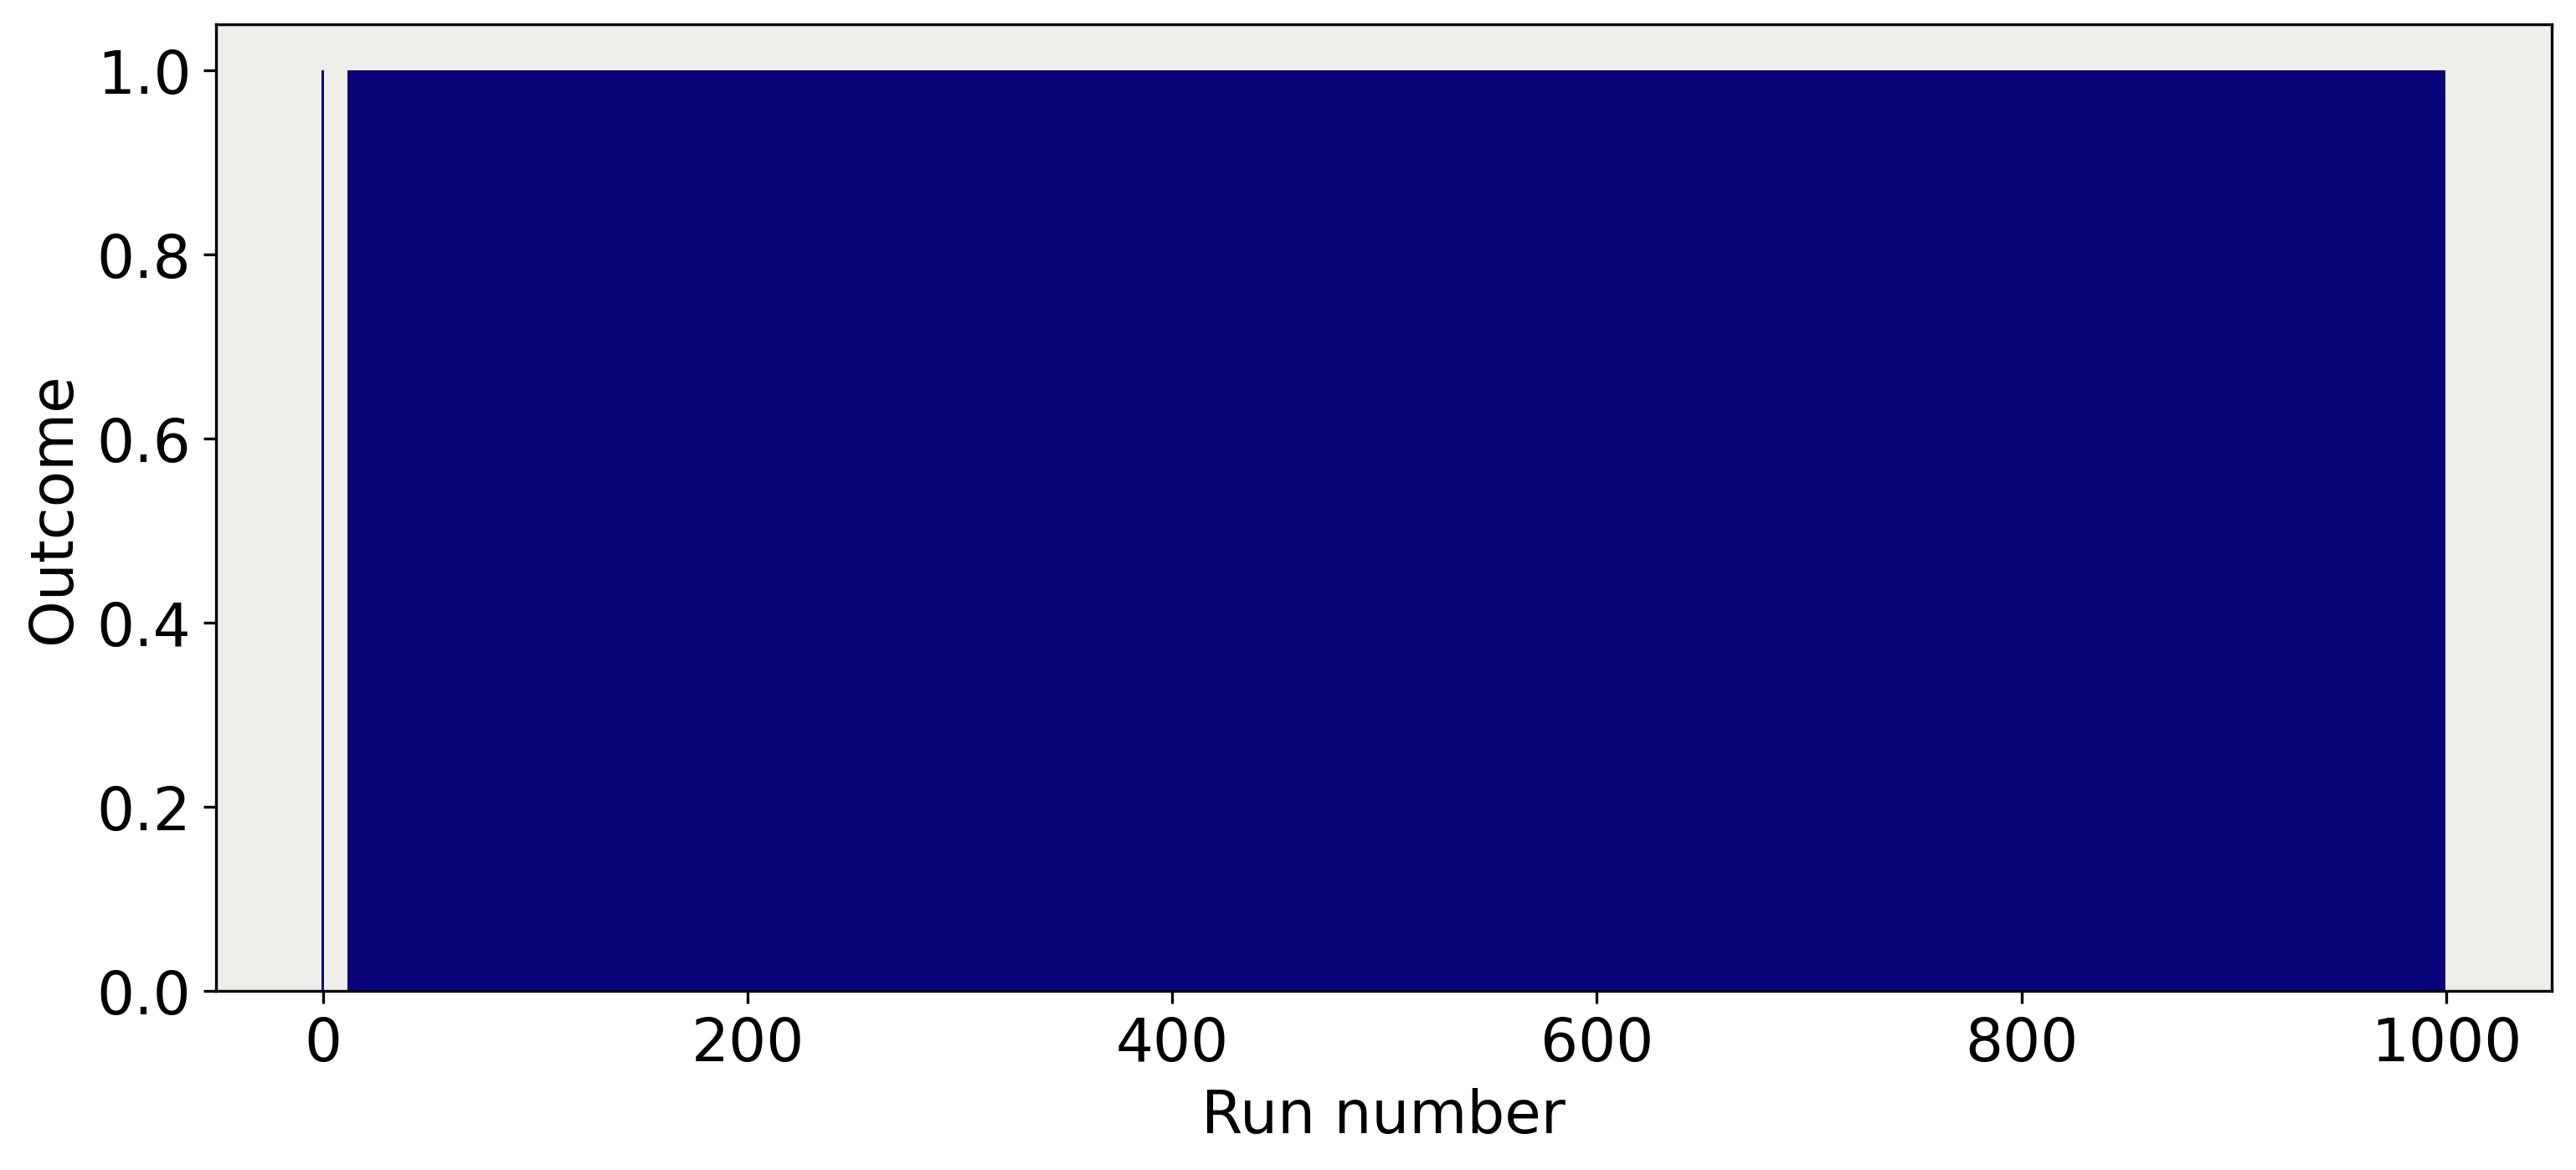

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

env = gym.make('CliffWalking-v0')  # Create the environment
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000  # Total number of episodes
alpha = 0.7  # Learning rate
gamma = 0.9
epsilon = 0.0  # Discount factor
outcomes = []  # List of outcomes to plot
nb_success = 0
print('Q-table before training:')
print(qtable)

 # par exemple, 10% du temps l'agent choisira une action au hasard

# Entraînement
for episode in range(episodes):
    state = env.reset()
    done = False
    # par défaut nous supposons notre sortie en faillure
    outcomes.append("Failure")  # Ajoutez ceci pour initialiser l'état de chaque épisode
    while not done:
        # Stratégie epsilon-greedy pour l'exploration-exploitation
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploration: choix d'une action aléatoire
        else:
            action = np.argmax(qtable[state])  # Exploitation: choix de la meilleure action connue

        # Exécution de l'action
        new_state, reward, done, info = env.step(action)

        # Mise à jour de la Q-table
        qtable[state, action] = qtable[state, action] + \
            alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state

        # Vérification si l'agent a touché la falaise
        if reward == -100:
            outcomes[episode] = "Cliff"
            done = True  # Fin de l'épisode
        elif done and new_state == env.observation_space.n - 1:
            outcomes[episode] = "Success"
            nb_success += 1

# Affichage du nombre total de succès
print(f"Nombre total de succès : {nb_success}")


print()
print('===========================================')
print('Q-table after training:')
print(qtable)
# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), [1 if outcome == "Success" else 0 for outcome in outcomes], color=["#0A047A" if outcome == "Success" else "#FF0000" for outcome in outcomes], width=1.0)
plt.show()


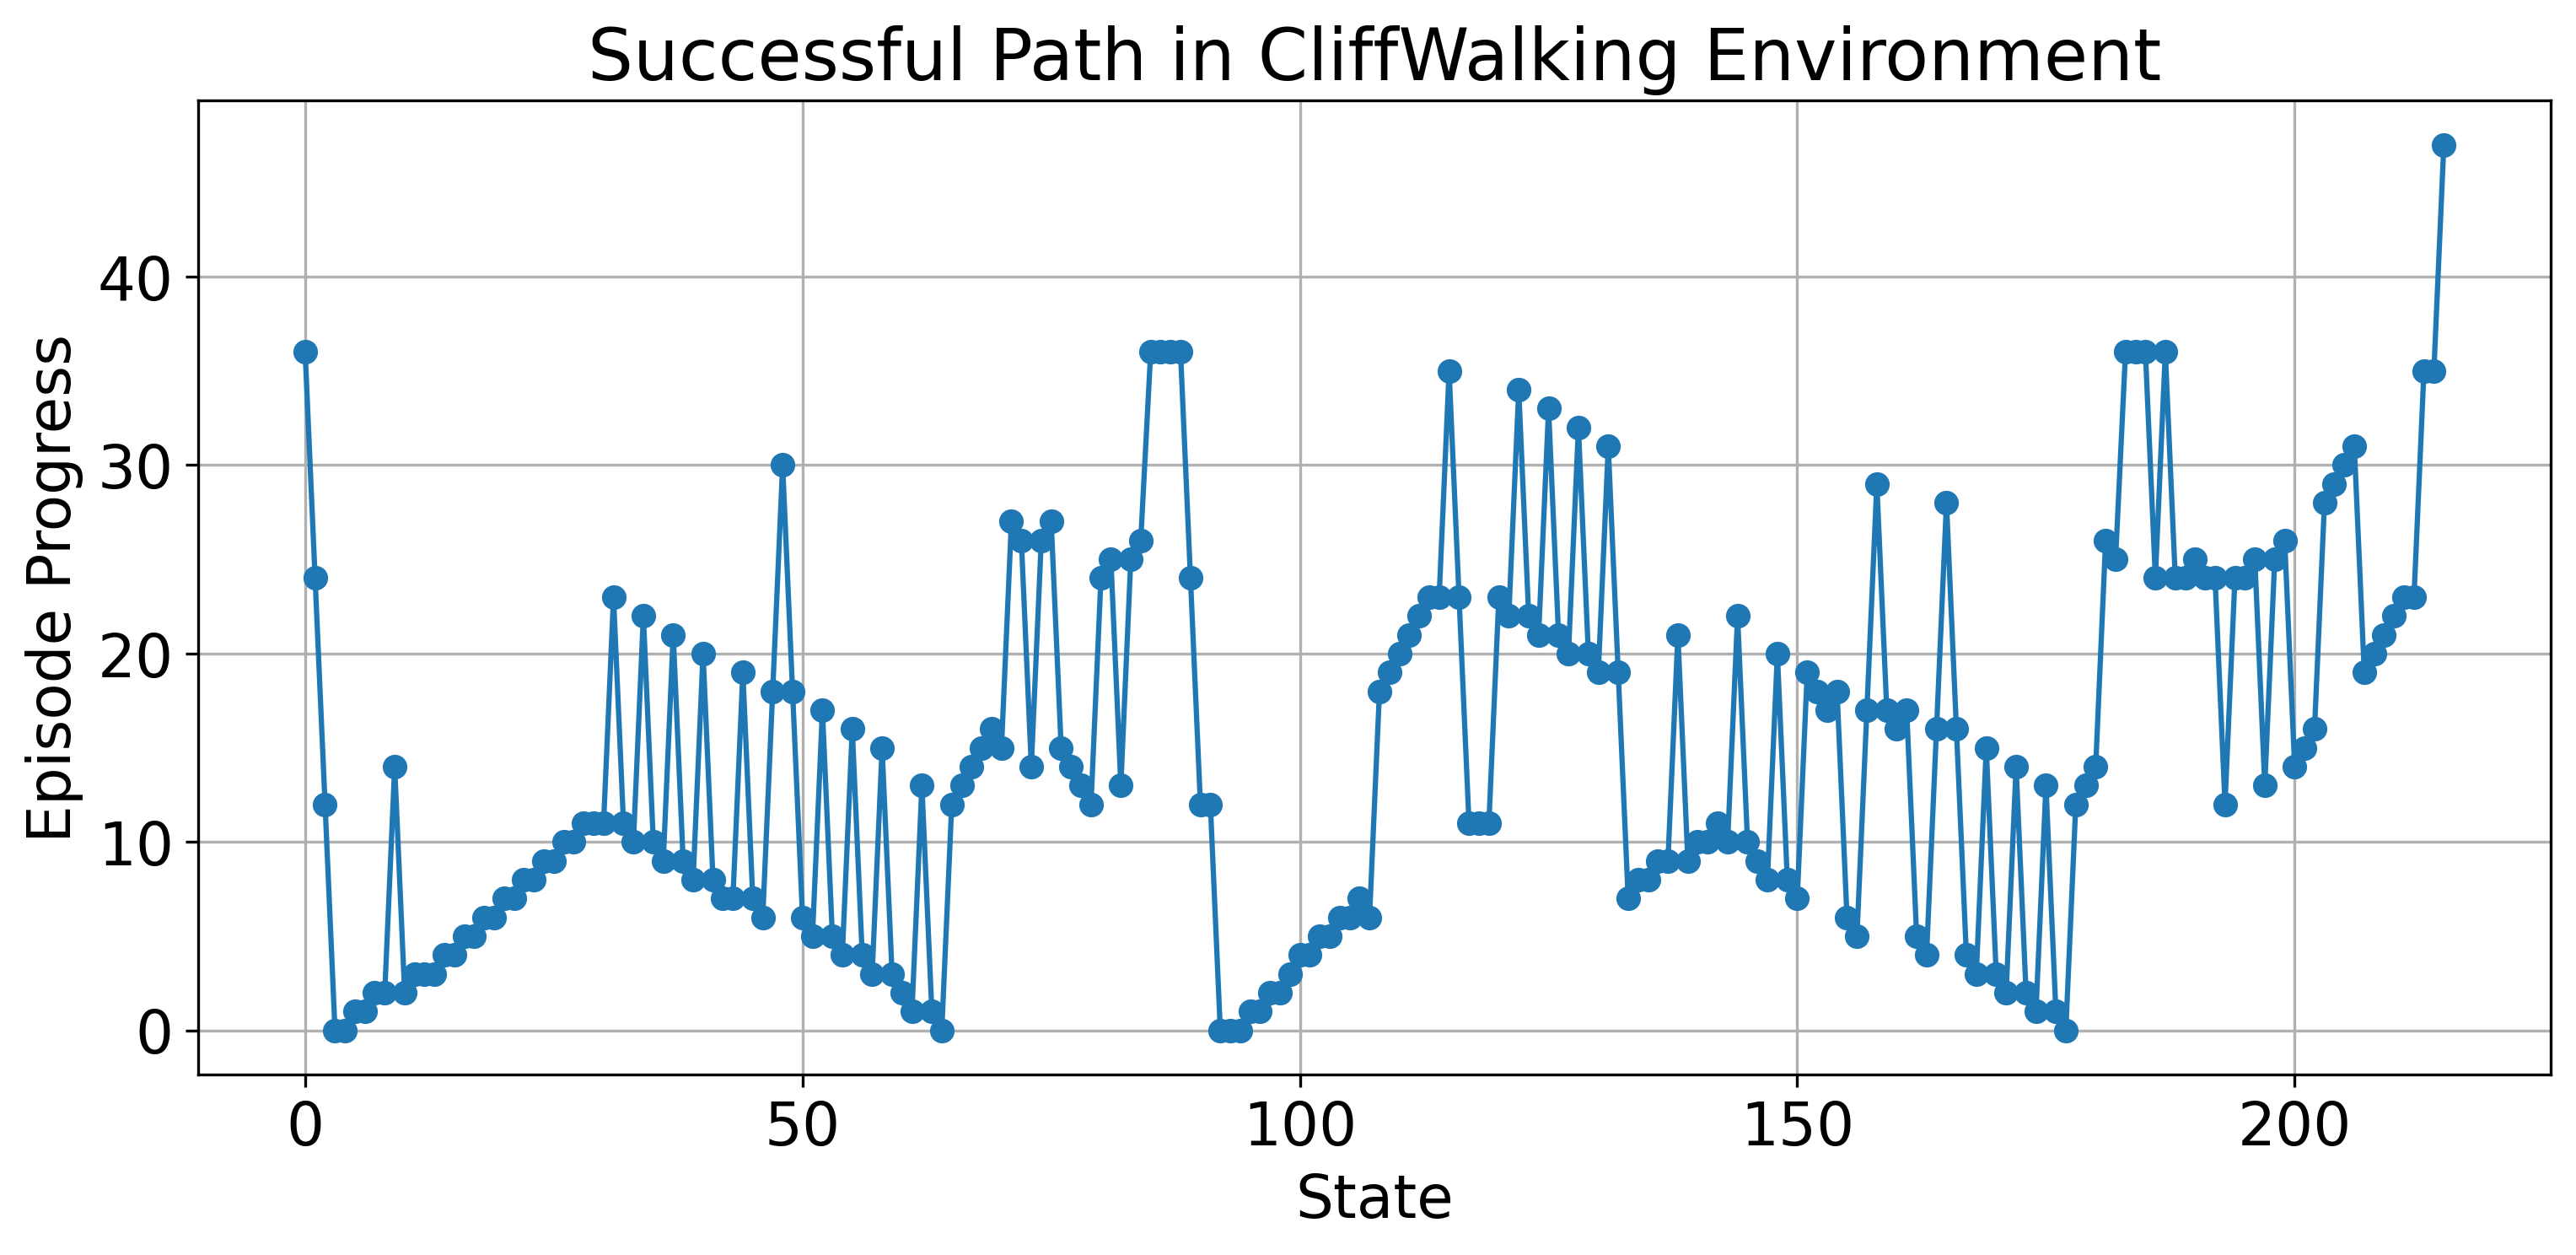

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CliffWalking-v0')
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000
alpha = 0.7
gamma = 0.9
epsilon = 0.1

successful_path = []  # Pour enregistrer le chemin d'un épisode réussi
success_found = False

for episode in range(episodes):
    state = env.reset()
    done = False
    temp_path = [state]  # Pour enregistrer le chemin temporaire de cet épisode

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qtable[state])

        new_state, reward, done, info = env.step(action)
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state
        temp_path.append(state)  # Enregistrement de chaque état visité

        if done and new_state == env.observation_space.n - 1:
            if not success_found:  # Enregistrer le premier chemin réussi trouvé
                successful_path = temp_path
                success_found = True
            break

# Visualisation du chemin réussi
plt.figure(figsize=(12, 5))
plt.title("Successful Path in CliffWalking Environment")
plt.xlabel("State")
plt.ylabel("Episode Progress")
plt.plot(successful_path, marker='o')
plt.grid(True)
plt.show()


# **Modèle non déterministe**

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Success rate: 0.16999999999999998%
Q-table after training:
[[  -7.93810871   -7.70901471   -7.71157742   -7.93811076]
 [  -7.7090156    -7.45446288   -7.45729738   -7.93811101]
 [  -7.45445823   -7.17162794   -7.17476446   -7.7090105 ]
 [  -7.17162816   

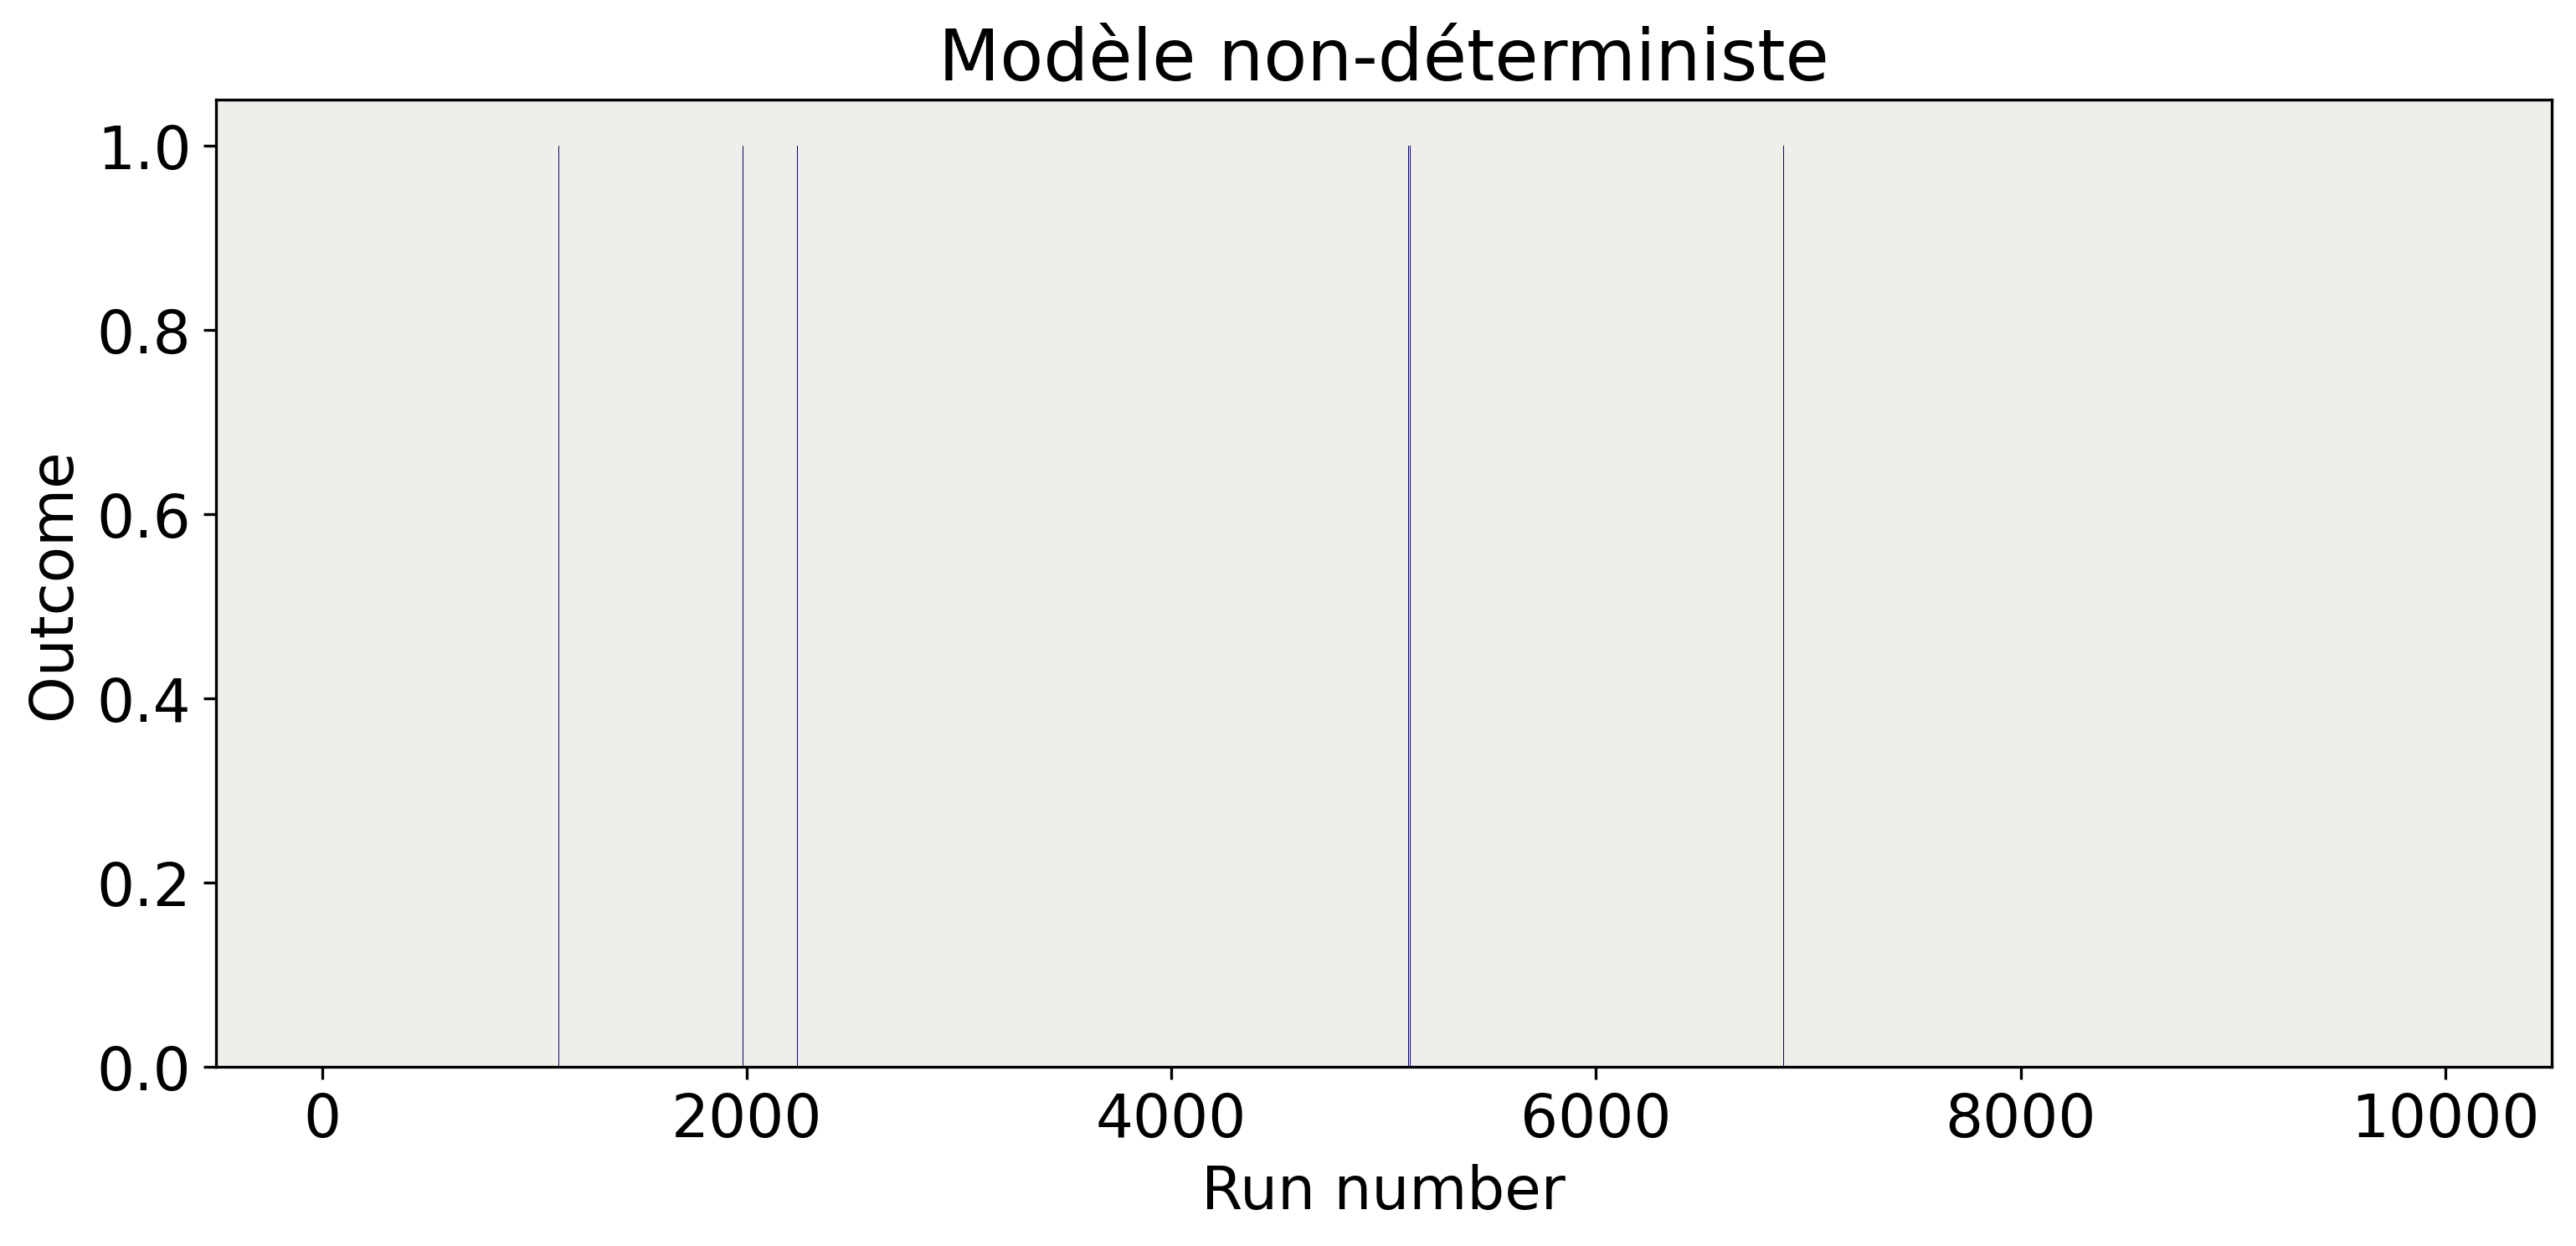

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Configure the display
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# Create the CliffWalking environment
env = gym.make('CliffWalking-v0')
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 10000  # Total number of episodes
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # High exploration rate to ensure randomness

outcomes = []  # List of outcomes for plotting
nb_success = 0  # Success counter

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = env.reset()
    done = False
    outcomes.append("Failure")  # Assume failure by default

    while not done:
        # Choose an action based on the highest value in the current state
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Random action (high exploration)
        else:
            action = np.argmax(qtable[state])  # Best known action (exploitation)

        # Take the action and receive new state and reward
        new_state, reward, done, info = env.step(action)

        # Update the Q-table
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state

        # If the agent falls off the cliff, it receives a -100 reward, indicating failure
        if reward == -100:
            done = True

        # If the agent reaches the goal (reward of -1 in CliffWalking), count it as success
        if done and reward == -1:
            nb_success += 1
            outcomes[-1] = "Success"

print(f"Success rate: {nb_success / episodes * 100}%")
print('Q-table after training:')
print(qtable)

# Plot the outcomes
plt.figure(figsize=(12, 5))
plt.title("Modèle non-déterministe")
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), [1 if outcome == "Success" else 0 for outcome in outcomes], color=["#0A047A" if outcome == "Success" else "#FF0000" for outcome in outcomes], width=1.0)
plt.show()



# **Machine Learning ( test car génération trop longue )**

In [ ]:
import gym
import pandas as pd

env = gym.make('CliffWalking-v0')
num_episodes = 1000
life_memory = []

for i in range(num_episodes):
    old_observation = env.reset()
    done = False
    tot_reward = 0
    ep_memory = []
    while not done:
        new_action = env.action_space.sample()
        observation, reward, done, info = env.step(new_action)
        tot_reward += reward

        ep_memory.append({
            "observation": old_observation,
            "action": new_action,
            "reward": reward,
            "episode": i,
        })
        old_observation = observation

    # incorporate total reward
    num_steps = len(ep_memory)
    for i, ep_mem in enumerate(ep_memory):
        ep_mem["tot_reward"] = tot_reward
        ep_mem["decay_reward"] = i * tot_reward / num_steps

    life_memory.extend(ep_memory)

memory_df = pd.DataFrame(life_memory)

# Calculate success rate
# In CliffWalking, success can be determined by whether the total reward is greater than a threshold
# For instance, assuming -1 for each step and -100 for falling off the cliff
success_episodes = memory_df.groupby('episode').reward.sum().apply(lambda x: x > -100).mean()
print(f"Success rate is: {success_episodes * 100}%")


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Success rate is: 0.3%


In [ ]:
memory_df.head()


,observation,action,reward,episode,tot_reward,decay_reward
0,36,3,-1,0,-2740,0.000000
1,36,0,-1,0,-2740,-7.527473
2,24,1,-1,0,-2740,-15.054945
3,25,3,-1,0,-2740,-22.582418
4,24,3,-1,0,-2740,-30.109890


In [ ]:

memory_df.describe()

,observation,action,reward,episode,tot_reward,decay_reward
count,6.211326e+06,6.211326e+06,6.211326e+06,6.211326e+06,6.211326e+06,6.211326e+06
mean,1.926885e+01,1.500750e+00,-1.015365e+01,4.952913e+02,-1.258850e+05,-6.293741e+04
std,1.278379e+01,1.118069e+00,2.867790e+01,2.825893e+02,9.419552e+04,6.540780e+04
min,0.000000e+00,0.000000e+00,-1.000000e+02,0.000000e+00,-5.993920e+05,-5.993815e+05
25%,1.200000e+01,1.000000e+00,-1.000000e+00,2.550000e+02,-1.631360e+05,-8.605262e+04
50%,2.400000e+01,2.000000e+00,-1.000000e+00,5.020000e+02,-1.025600e+05,-4.355374e+04
75%,3.600000e+01,3.000000e+00,-1.000000e+00,7.340000e+02,-6.184000e+04,-1.798320e+04
max,3.600000e+01,3.000000e+00,-1.000000e+00,9.990000e+02,-3.100000e+01,0.000000e+00


In [ ]:
y = 1*memory_df.reward + memory_df.tot_reward + .1*memory_df.decay_reward
x = memory_df[["observation", "action"]]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 5)
gb.fit(x, y)


GradientBoostingRegressor(n_estimators=5)

In [ ]:
import gym
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Préparez l'environnement
env = gym.make('CliffWalking-v0')

# Réduire le nombre d'épisodes pour l'entraînement
num_episodes_train = 500  # Réduit de 1000 à 500
num_episodes_test = 1
life_memory = []

# Préparation du modèle
gb = GradientBoostingRegressor(n_estimators=5)

# Entraînement initial avec des actions aléatoires
for episode in range(num_episodes_train):
    observation = env.reset()
    done = False
    tot_reward = 0
    ep_memory = []

    while not done:
        action = env.action_space.sample()
        new_observation, reward, done, _ = env.step(action)
        tot_reward += reward

        ep_memory.append([observation, action, reward, episode, tot_reward])
        observation = new_observation

    life_memory.extend(ep_memory)

# Conversion en DataFrame pour le traitement
memory_df = pd.DataFrame(life_memory, columns=["observation", "action", "reward", "episode", "tot_reward"])

# Préparation des données pour l'entraînement
X = memory_df[["observation", "action"]]
y = memory_df["reward"] + memory_df["tot_reward"]

# Entraînement du modèle
gb.fit(X, y)

# Test avec le modèle entraîné
for episode in range(num_episodes_test):
    observation = env.reset()
    done = False
    tot_reward = 0
    ep_memory = []

    while not done:
        pred_in = np.array([[observation, action] for action in range(4)])
        action = np.argmax(gb.predict(pred_in))
        new_observation, reward, done, _ = env.step(action)
        tot_reward += reward

        ep_memory.append([observation, action, reward, episode, tot_reward])
        observation = new_observation

    life_memory.extend(ep_memory)

# Commentaires :
# 1. Réduction du nombre d'épisodes pour accélérer l'entraînement.
# 2. Utilisation de listes et conversion en DataFrame seulement à la fin pour améliorer la performance.
# 3. Optimisation du modèle de prédiction pour réduire la charge de calcul.


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

KeyboardInterrupt: ignored